In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns

In [3]:
list_csv = glob.glob('*.csv')
df = vars()
for file in list_csv:
    df[file[:-4]] = pd.read_csv(file)
    

In [4]:
list_csv

['best_movies_netflix.csv',
 'best_movie_by_year_netflix.csv',
 'best_shows_netflix.csv',
 'best_show_by_year_netflix.csv',
 'raw_credits.csv',
 'raw_titles.csv']

In [5]:
best_movie_by_year_netflix.shape

(49, 5)

In [6]:
best_movies_netflix.shape

(387, 7)

In [7]:
best_movies_netflix.isnull().sum()

title              0
release_year       0
score              0
number_of_votes    0
duration           0
main_genre         0
main_production    0
dtype: int64

In [8]:
best_show_by_year_netflix.isnull().sum()

title                0
release_year         0
score                0
number_of_seasons    0
main_genre           0
main_production      0
dtype: int64

In [9]:
best_shows_netflix.isnull().sum()

title                0
release_year         0
score                0
number_of_votes      0
duration             0
number_of_seasons    0
main_genre           0
main_production      0
dtype: int64

In [10]:
list_csv

['best_movies_netflix.csv',
 'best_movie_by_year_netflix.csv',
 'best_shows_netflix.csv',
 'best_show_by_year_netflix.csv',
 'raw_credits.csv',
 'raw_titles.csv']

In [11]:
raw_credits.shape

(77213, 5)

In [12]:
raw_credits.isnull().sum()

person_id       0
id              0
name            0
character    9627
role            0
dtype: int64

In [13]:
raw_credits['character']

0                  Travis Bickle
1                  Iris Steensma
2                            Tom
3        Matthew 'Sport' Higgins
4                          Betsy
                  ...           
77208                     Afinni
77209             Dr. Ian Stones
77210                       Jane
77211                 Nurse Titi
77212                        NaN
Name: character, Length: 77213, dtype: object

In [14]:
raw_titles.isnull().sum()

id                         0
title                      1
type                       0
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
dtype: int64

In [15]:
raw_titles['seasons'].value_counts()

1.0     1187
2.0      374
3.0      181
4.0      116
5.0       76
6.0       40
7.0       16
8.0       14
9.0        9
11.0       7
10.0       5
15.0       4
12.0       4
24.0       3
13.0       2
14.0       2
19.0       1
18.0       1
29.0       1
21.0       1
42.0       1
39.0       1
37.0       1
Name: seasons, dtype: int64

In [16]:
raw_titles.isnull().sum()/len(raw_titles)*100

id                       0.000000
title                    0.017224
type                     0.000000
release_year             0.000000
age_certification       44.953496
runtime                  0.000000
genres                   0.000000
production_countries     0.000000
seasons                 64.743369
imdb_id                  7.647261
imdb_score               9.007923
imdb_votes               9.283500
dtype: float64

In [17]:
raw_titles.drop(['age_certification', 'seasons'], axis = 1, inplace = True)

In [18]:
raw_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   release_year          5806 non-null   int64  
 4   runtime               5806 non-null   int64  
 5   genres                5806 non-null   object 
 6   production_countries  5806 non-null   object 
 7   imdb_id               5362 non-null   object 
 8   imdb_score            5283 non-null   float64
 9   imdb_votes            5267 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 453.7+ KB


In [19]:
raw_titles['imdb_score']

0       NaN
1       8.3
2       8.2
3       8.0
4       8.1
       ... 
5801    6.9
5802    NaN
5803    6.5
5804    6.2
5805    8.8
Name: imdb_score, Length: 5806, dtype: float64

In [20]:
raw_titles['imdb_score'].median()

6.6

In [21]:
raw_titles['imdb_score'].fillna(raw_titles['imdb_score'].median(), inplace = True)

In [22]:
raw_titles['imdb_score']

0       6.6
1       8.3
2       8.2
3       8.0
4       8.1
       ... 
5801    6.9
5802    6.6
5803    6.5
5804    6.2
5805    8.8
Name: imdb_score, Length: 5806, dtype: float64

In [23]:
raw_titles['imdb_votes'].median()

2279.0

In [24]:
raw_titles['imdb_votes'].fillna(raw_titles['imdb_votes'].median(), inplace = True)

In [25]:
raw_titles['imdb_votes']

0         2279.0
1       795222.0
2       530877.0
3       392419.0
4       391942.0
          ...   
5801        39.0
5802      2279.0
5803        32.0
5804         9.0
5805        16.0
Name: imdb_votes, Length: 5806, dtype: float64

In [26]:
raw_titles[raw_titles['title'].isnull()]

,id,title,type,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes
1805,tm1063792,NaN,MOVIE,2015,11,[],[],tt4661188,6.6,2279.0


In [27]:
raw_titles.dropna(subset = 'title', axis = 0, inplace = True) # here we are removing NaN from title using subset (indidcates we column u need) and deleted row by  axis = 0  

In [28]:
raw_titles.dropna(subset = 'title', axis = 0).isnull().sum()

id                        0
title                     0
type                      0
release_year              0
runtime                   0
genres                    0
production_countries      0
imdb_id                 444
imdb_score                0
imdb_votes                0
dtype: int64

In [29]:
raw_titles.head(3)

,id,title,type,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,48,['documentation'],['US'],NaN,6.6,2279.0
1,tm84618,Taxi Driver,MOVIE,1976,113,"['crime', 'drama']",['US'],tt0075314,8.3,795222.0
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,91,"['comedy', 'fantasy']",['GB'],tt0071853,8.2,530877.0


In [30]:
raw_titles['runtime']==0

0       False
1       False
2       False
3       False
4       False
        ...  
5801    False
5802    False
5803    False
5804    False
5805     True
Name: runtime, Length: 5805, dtype: bool

In [31]:
raw_titles['runtime'].value_counts()

24     129
90     122
45     108
95     105
100    104
      ... 
192      1
213      1
183      1
173      1
176      1
Name: runtime, Length: 205, dtype: int64

In [32]:
raw_titles = raw_titles[raw_titles['runtime']!=0]

In [33]:
raw_titles

,id,title,type,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,48,['documentation'],['US'],NaN,6.6,2279.0
1,tm84618,Taxi Driver,MOVIE,1976,113,"['crime', 'drama']",['US'],tt0075314,8.3,795222.0
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,91,"['comedy', 'fantasy']",['GB'],tt0071853,8.2,530877.0
3,tm70993,Life of Brian,MOVIE,1979,94,['comedy'],['GB'],tt0079470,8.0,392419.0
4,tm190788,The Exorcist,MOVIE,1973,133,['horror'],['US'],tt0070047,8.1,391942.0
...,...,...,...,...,...,...,...,...,...,...
5800,tm1040816,Momshies! Your Soul is Mine,MOVIE,2021,108,['comedy'],['PH'],tt14412240,5.8,26.0
5801,tm1014599,Fine Wine,MOVIE,2021,100,"['romance', 'drama']",['NG'],tt13857480,6.9,39.0
5802,tm1108171,Edis Starlight,MOVIE,2021,74,"['music', 'documentation']",[],NaN,6.6,2279.0
5803,tm1045018,Clash,MOVIE,2021,88,"['family', 'drama']","['NG', 'CA']",tt14620732,6.5,32.0


# Is there a relationship between runtime & imdb score

C:\Users\240G_up\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


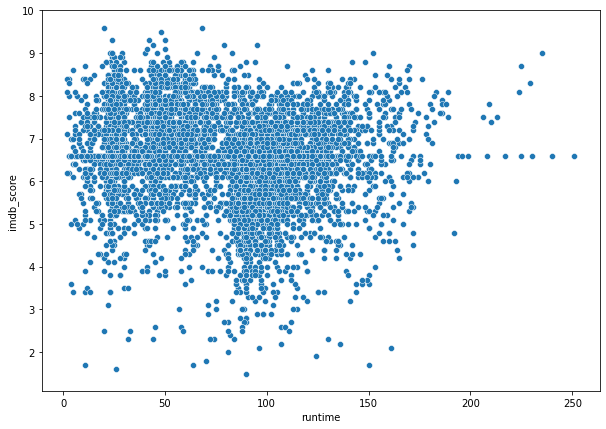

In [34]:
plt.figure(figsize = (10,7))
sns.scatterplot('runtime', 'imdb_score', data = raw_titles) # to find relation whether it depends for both columns we use scatterplot 
import warnings

In [35]:
list_csv

['best_movies_netflix.csv',
 'best_movie_by_year_netflix.csv',
 'best_shows_netflix.csv',
 'best_show_by_year_netflix.csv',
 'raw_credits.csv',
 'raw_titles.csv']

In [36]:
raw_titles.head(3)

,id,title,type,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,48,['documentation'],['US'],NaN,6.6,2279.0
1,tm84618,Taxi Driver,MOVIE,1976,113,"['crime', 'drama']",['US'],tt0075314,8.3,795222.0
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,91,"['comedy', 'fantasy']",['GB'],tt0071853,8.2,530877.0


In [37]:
raw_titles['type'].isnull().sum()

0

In [38]:
raw_titles['imdb_score'].isnull().sum()

0

In [39]:
raw_titles['type'].value_counts()

MOVIE    3758
SHOW     2023
Name: type, dtype: int64

In [40]:
raw_titles['imdb_score'].value_counts()

6.6    717
6.8    198
6.5    192
6.2    190
7.4    188
      ... 
2.0      1
1.5      1
1.9      1
9.5      1
1.8      1
Name: imdb_score, Length: 81, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

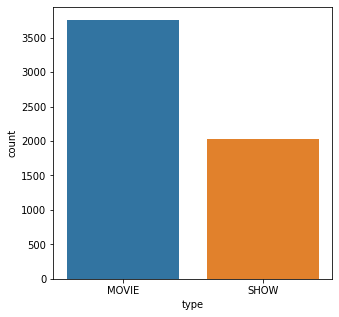

In [41]:
plt.figure(figsize= (5,5))
sns.countplot(x = raw_titles['type'],order = raw_titles['type'].value_counts().index)

In [42]:
raw_titles['imdb_score'].value_counts()

6.6    717
6.8    198
6.5    192
6.2    190
7.4    188
      ... 
2.0      1
1.5      1
1.9      1
9.5      1
1.8      1
Name: imdb_score, Length: 81, dtype: int64

In [43]:
raw_titles[raw_titles['imdb_score']==raw_titles['imdb_score'].max()]['type']

656     SHOW
2927    SHOW
Name: type, dtype: object

In [44]:
raw_titles['imdb_score'].describe()

count    5781.000000
mean        6.537295
std         1.108133
min         1.500000
25%         5.900000
50%         6.600000
75%         7.300000
max         9.600000
Name: imdb_score, dtype: float64

Text(0, 0.5, '')

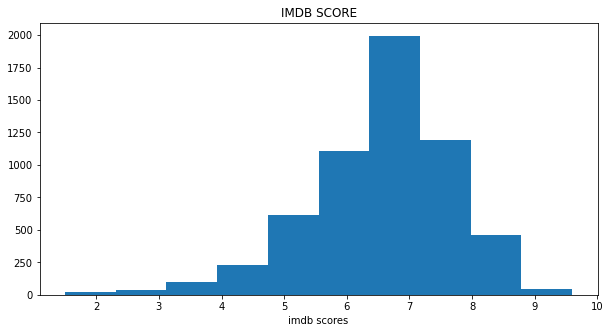

In [45]:
plt.figure(figsize = (10,5))
plt.hist(raw_titles['imdb_score'])
plt.title('IMDB SCORE')
plt.xlabel('imdb scores')
plt.ylabel('')

In [46]:
raw_types = raw_titles['type'].value_counts()

In [47]:
raw_types

MOVIE    3758
SHOW     2023
Name: type, dtype: int64

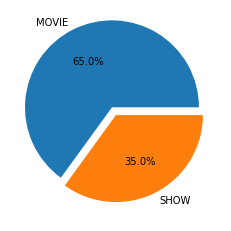

In [48]:
plt.pie(raw_types, labels = raw_types.index, autopct = '%0.1f%%', explode = [0.1, 0])
plt.style.use('classic')

In [49]:
raw_titles.groupby(['type'])['imdb_score'].max()

type
MOVIE    9.0
SHOW     9.6
Name: imdb_score, dtype: float64

In [50]:
raw_titles.groupby(['imdb_score'])['type'].max()

imdb_score
1.5    MOVIE
1.6     SHOW
1.7     SHOW
1.8     SHOW
1.9    MOVIE
       ...  
9.1     SHOW
9.2     SHOW
9.3     SHOW
9.5     SHOW
9.6     SHOW
Name: type, Length: 81, dtype: object

In [51]:
raw_titles.groupby(['imdb_score'])['type'].max().value_counts()

SHOW     68
MOVIE    13
Name: type, dtype: int64

In [52]:
raw_titles.groupby(['type'])['imdb_votes'].max()

type
MOVIE    2268288.0
SHOW     1727694.0
Name: imdb_votes, dtype: float64

# top 5 years where more movie released

In [53]:
raw_titles.head()

,id,title,type,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,48,['documentation'],['US'],NaN,6.6,2279.0
1,tm84618,Taxi Driver,MOVIE,1976,113,"['crime', 'drama']",['US'],tt0075314,8.3,795222.0
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,91,"['comedy', 'fantasy']",['GB'],tt0071853,8.2,530877.0
3,tm70993,Life of Brian,MOVIE,1979,94,['comedy'],['GB'],tt0079470,8.0,392419.0
4,tm190788,The Exorcist,MOVIE,1973,133,['horror'],['US'],tt0070047,8.1,391942.0


In [54]:
 raw_titles['release_year'].value_counts()

2019    843
2020    802
2018    772
2021    753
2017    578
       ... 
1974      1
1959      1
1962      1
1978      1
1945      1
Name: release_year, Length: 67, dtype: int64

In [55]:
raw_new = raw_titles['release_year'].value_counts().sort_values(ascending = False)

In [56]:
raw_new

2019    843
2020    802
2018    772
2021    753
2017    578
       ... 
1963      1
1961      1
1967      1
1964      1
1945      1
Name: release_year, Length: 67, dtype: int64

In [57]:
raw_new.values

array([843, 802, 772, 753, 578, 371, 235, 214, 160, 142, 110, 104,  73,
        65,  63,  53,  52,  36,  35,  33,  26,  23,  21,  21,  15,  14,
        13,  13,  13,  12,  10,   8,   8,   7,   7,   7,   6,   6,   5,
         5,   4,   4,   4,   3,   3,   2,   2,   2,   2,   2,   2,   2,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1], dtype=int64)

In [58]:
top5_years = raw_new[raw_new.index[0:5]]

In [59]:
raw_new[:5].index

Int64Index([2019, 2020, 2018, 2021, 2017], dtype='int64')

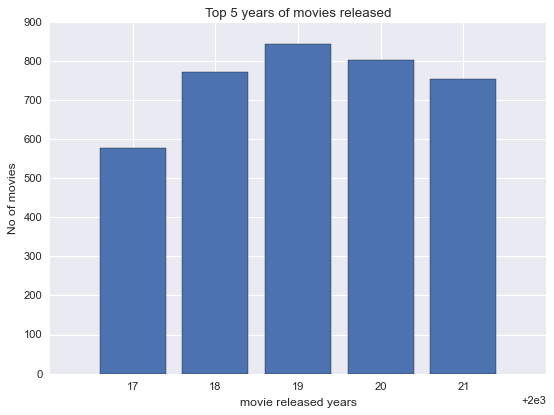

In [60]:
plt.style.use('seaborn')
plt.bar(raw_new[:5].index, raw_new[:5].values)
plt.xlabel('movie released years')
plt.ylabel('No of movies')
plt.title('Top 5 years of movies released')
plt.xticks(raw_new.index[0:5]);

In [61]:
raw_titles[raw_titles['type']=='MOVIE'].sort_values('release_year', ascending=False)

,id,title,type,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes
5099,tm1146393,All Hail,MOVIE,2022,118,"['comedy', 'drama']",['AR'],tt16427718,5.6,2840.0
5706,tm1159298,Erax,MOVIE,2022,13,"['family', 'thriller']",[],tt17162512,6.6,2279.0
5631,tm1164320,Behind the Scenes With Jane Campion,MOVIE,2022,17,['documentation'],['US'],NaN,6.6,2279.0
5086,tm1165219,Ali Wong: Don Wong,MOVIE,2022,59,['comedy'],['US'],tt17542000,6.5,1828.0
5091,tm1138870,Badhaai Do,MOVIE,2022,147,"['comedy', 'drama', 'crime']",['IN'],tt11934846,7.3,15032.0
...,...,...,...,...,...,...,...,...,...,...
16,tm135083,Cairo Station,MOVIE,1958,77,"['drama', 'crime', 'comedy']",['EG'],tt0051390,7.5,4385.0
22,tm204541,Dark Waters,MOVIE,1956,120,"['drama', 'action', 'romance', 'thriller']",['EG'],tt0049761,6.7,590.0
15,tm16479,White Christmas,MOVIE,1954,115,"['romance', 'comedy', 'music']",['US'],tt0047673,7.5,42373.0
28,tm19608,The Blazing Sun,MOVIE,1954,100,"['romance', 'crime', 'drama']",['EG'],tt0044429,7.4,1219.0


In [62]:
raw_titles['release_year'].value_counts()

2019    843
2020    802
2018    772
2021    753
2017    578
       ... 
1974      1
1959      1
1962      1
1978      1
1945      1
Name: release_year, Length: 67, dtype: int64

In [63]:
raw_titles[['type', 'imdb_score']].sort_values('imdb_score', ascending = False)[:10]

,type,imdb_score
2927,SHOW,9.6
656,SHOW,9.6
243,SHOW,9.5
259,SHOW,9.3
3320,SHOW,9.3
3827,SHOW,9.3
5059,SHOW,9.2
1422,SHOW,9.2
2057,SHOW,9.2
3196,SHOW,9.1


In [64]:
raw_titles.head(3)

,id,title,type,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,48,['documentation'],['US'],NaN,6.6,2279.0
1,tm84618,Taxi Driver,MOVIE,1976,113,"['crime', 'drama']",['US'],tt0075314,8.3,795222.0
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,91,"['comedy', 'fantasy']",['GB'],tt0071853,8.2,530877.0


# 1) Does movies or  shows has highest IMDB Score

In [65]:
show_imdb = raw_titles.loc[raw_titles['type']=='SHOW', 'imdb_score']

In [66]:
show_imdb

0       6.6
5       8.8
29      8.1
47      8.9
55      6.9
       ... 
5785    5.1
5793    6.6
5794    6.6
5796    4.6
5799    6.6
Name: imdb_score, Length: 2023, dtype: float64

In [67]:
movie_imdb = raw_titles.loc[raw_titles['type']== 'MOVIE', 'imdb_score']

In [68]:
movie_imdb

1       8.3
2       8.2
3       8.0
4       8.1
6       7.7
       ... 
5800    5.8
5801    6.9
5802    6.6
5803    6.5
5804    6.2
Name: imdb_score, Length: 3758, dtype: float64

Text(0, 0.5, 'frequency')

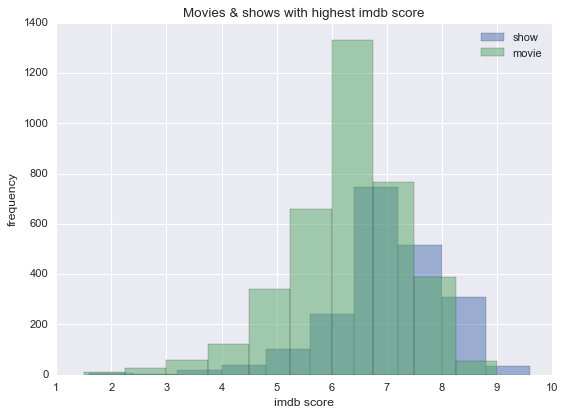

In [69]:
plt.hist(show_imdb, alpha = 0.5, label = 'show')
plt.hist(movie_imdb, alpha = 0.5, label = 'movie')
plt.legend()
plt.title('Movies & shows with highest imdb score')
plt.xlabel('imdb score')
plt.ylabel('frequency')

In [70]:
raw_titles.head(2)

,id,title,type,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,48,['documentation'],['US'],NaN,6.6,2279.0
1,tm84618,Taxi Driver,MOVIE,1976,113,"['crime', 'drama']",['US'],tt0075314,8.3,795222.0


In [71]:
import re
raw_titles['production_countries']= raw_titles['production_countries'].apply(lambda production_countries : re.sub(r'[^A-Z,]+','', production_countries))

In [72]:
raw_titles

,id,title,type,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,48,['documentation'],US,NaN,6.6,2279.0
1,tm84618,Taxi Driver,MOVIE,1976,113,"['crime', 'drama']",US,tt0075314,8.3,795222.0
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,91,"['comedy', 'fantasy']",GB,tt0071853,8.2,530877.0
3,tm70993,Life of Brian,MOVIE,1979,94,['comedy'],GB,tt0079470,8.0,392419.0
4,tm190788,The Exorcist,MOVIE,1973,133,['horror'],US,tt0070047,8.1,391942.0
...,...,...,...,...,...,...,...,...,...,...
5800,tm1040816,Momshies! Your Soul is Mine,MOVIE,2021,108,['comedy'],PH,tt14412240,5.8,26.0
5801,tm1014599,Fine Wine,MOVIE,2021,100,"['romance', 'drama']",NG,tt13857480,6.9,39.0
5802,tm1108171,Edis Starlight,MOVIE,2021,74,"['music', 'documentation']",,NaN,6.6,2279.0
5803,tm1045018,Clash,MOVIE,2021,88,"['family', 'drama']","NG,CA",tt14620732,6.5,32.0


In [73]:
# raw_titles['production_countries'] = raw_titles['production_countries'].str.replace(',', '_')

In [74]:
raw_titles.shape

(5781, 10)

In [75]:
raw_titles['production_countries'].value_counts()

US             1940
IN              604
JP              265
                226
GB              219
               ... 
PR,US,GB,CN       1
GB,US,FR          1
IT,ES,FR          1
GB,US,CZ          1
NG,CA             1
Name: production_countries, Length: 448, dtype: int64

In [76]:
raw_titles['production_countries']= raw_titles['production_countries'].replace('', 'unknown_country')

In [77]:
raw_titles['production_countries'].value_counts()

US                 1940
IN                  604
JP                  265
unknown_country     226
GB                  219
                   ... 
PR,US,GB,CN           1
GB,US,FR              1
IT,ES,FR              1
GB,US,CZ              1
NG,CA                 1
Name: production_countries, Length: 448, dtype: int64

In [78]:
raw_titles['production_countries']

0                    US
1                    US
2                    GB
3                    GB
4                    US
             ...       
5800                 PH
5801                 NG
5802    unknown_country
5803              NG,CA
5804    unknown_country
Name: production_countries, Length: 5781, dtype: object

In [79]:
raw_titles['production_countries'].unique()

array(['US', 'GB', 'US,GB', 'JP', 'EG', 'DE', 'IN', 'unknown_country',
       'DZ,EG', 'LB', 'FR,LB,CA', 'IN,SU', 'US,IT', 'HK,US', 'GB,US',
       'AR', 'KW', 'EG,FR', 'FR,LB', 'US,JP', 'US,CA', 'DE,US', 'US,DE',
       'CA,US', 'US,FR', 'PE,US,BR', 'IT,US,FR', 'US,HK', 'FR,IE,GB,DE',
       'GH,GB,US,BF,DE', 'AR,ES', 'FR', 'MX', 'AU', 'CO', 'BE,FR,NO,LB',
       'IT,LB,BE,FR', 'US,FR,DE,PS', 'TR', 'CA', 'GB,US,BS,CZ,DE',
       'GB,US,AU', 'DE,ES,US,FR', 'GB,US,AU,DE', 'JP,US', 'US,IS,GB',
       'DK', 'NZ,JP,US', 'US,CA,FR', 'GB,US,DE', 'US,DE,IT,GB',
       'CA,DE,US', 'HK,CN', 'IT,US', 'FR,JP,US', 'US,BE', 'KR', 'IT',
       'BG,GB,US', 'US,AU', 'ES,GB', 'GB,US,JP', 'CN,HK', 'RU', 'CN',
       'SG', 'GB,US,CA', 'HK,JP', 'CA,GB,US', 'ES,FR,MX', 'IN,CA,US',
       'PS,FR,MA,DE', 'HK', 'DE,UY,ES,AR', 'ES,AR', 'US,IN', 'TW',
       'IN,US', 'MY', 'ES,CH,PS,BE,FR', 'CL,AR', 'DE,KW,PS,FR', 'CL',
       'NG', 'PS', 'GB,FR,LB', 'ZA', 'SA', 'NG,GB,US,AT,FR,DE', 'LB,FR',
       'GB,DK,NL,SE

In [80]:
unique_words = []
for i in raw_titles['production_countries']:
    for j in str(i).split(','):
        if j not in unique_words:
            unique_words.append(j)

In [81]:
unique_words

['US',
 'GB',
 'JP',
 'EG',
 'DE',
 'IN',
 'unknown_country',
 'DZ',
 'LB',
 'FR',
 'CA',
 'SU',
 'IT',
 'HK',
 'AR',
 'KW',
 'PE',
 'BR',
 'IE',
 'GH',
 'BF',
 'ES',
 'MX',
 'AU',
 'CO',
 'BE',
 'NO',
 'PS',
 'TR',
 'BS',
 'CZ',
 'IS',
 'DK',
 'NZ',
 'CN',
 'KR',
 'BG',
 'RU',
 'SG',
 'MA',
 'UY',
 'TW',
 'MY',
 'CH',
 'CL',
 'NG',
 'ZA',
 'SA',
 'AT',
 'NL',
 'SE',
 'PH',
 'L',
 'TH',
 'XX',
 'AE',
 'HU',
 'ID',
 'IL',
 'FI',
 'RO',
 'CD',
 'PL',
 'VE',
 'UA',
 'IR',
 'JO',
 'QA',
 'LU',
 'BY',
 'SK',
 'HR',
 'SY',
 'GL',
 'PT',
 'PK',
 'VN',
 'PR',
 'IQ',
 'KH',
 'GE',
 'CU',
 'KE',
 'VA',
 'RS',
 'AL',
 'TZ',
 'TN',
 'ZW',
 'PY',
 'NP',
 'GR',
 'CM',
 'BD',
 'KG',
 'LT',
 'CY',
 'SN',
 'MW',
 'IO',
 'MU',
 'LK',
 'AO',
 'GT',
 'MZ',
 'AF',
 'NA',
 'FO']

In [82]:
raw_titles['production_countries'].isnull().sum()

0

In [83]:
raw_titles.shape

(5781, 10)

In [84]:
raw_titles = raw_titles.loc[raw_titles['production_countries']!= 'unknown_country', :]

In [85]:
raw_titles.reset_index(drop = True, inplace = True)

In [86]:
raw_titles.shape

(5555, 10)

In [87]:
raw_titles['production_countries'].isnull().sum()

0

In [88]:
raw_titles['production_countries'].value_counts()

US             1940
IN              604
JP              265
GB              219
KR              210
               ... 
PR,US,GB,CN       1
GB,US,FR          1
IT,ES,FR          1
GB,US,CZ          1
NG,CA             1
Name: production_countries, Length: 447, dtype: int64

In [153]:
unique_words = []
for i in raw_titles['production_countries']:
    for j in str(i).split(','):
        if j not in unique_words:
            unique_words.append(j)
          

In [155]:
unique_words

['US',
 'GB',
 'JP',
 'EG',
 'DE',
 'IN',
 'DZ',
 'LB',
 'FR',
 'CA',
 'SU',
 'IT',
 'HK',
 'AR',
 'KW',
 'PE',
 'BR',
 'IE',
 'GH',
 'BF',
 'ES',
 'MX',
 'AU',
 'CO',
 'BE',
 'NO',
 'PS',
 'TR',
 'BS',
 'CZ',
 'IS',
 'DK',
 'NZ',
 'CN',
 'KR',
 'BG',
 'RU',
 'SG',
 'MA',
 'UY',
 'TW',
 'MY',
 'CH',
 'CL',
 'NG',
 'ZA',
 'SA',
 'AT',
 'NL',
 'SE',
 'PH',
 'L',
 'TH',
 'AE',
 'HU',
 'XX',
 'ID',
 'IL',
 'FI',
 'RO',
 'CD',
 'PL',
 'VE',
 'UA',
 'IR',
 'JO',
 'QA',
 'LU',
 'BY',
 'SK',
 'HR',
 'SY',
 'GL',
 'PT',
 'PK',
 'VN',
 'PR',
 'IQ',
 'KH',
 'GE',
 'CU',
 'KE',
 'VA',
 'RS',
 'AL',
 'TZ',
 'TN',
 'ZW',
 'PY',
 'NP',
 'GR',
 'CM',
 'BD',
 'KG',
 'LT',
 'CY',
 'SN',
 'MW',
 'IO',
 'MU',
 'LK',
 'AO',
 'GT',
 'MZ',
 'AF',
 'NA',
 'FO']

In [151]:
len(unique_words) # we have 107 unique words of countries and we are doing one hot encoding for those unique value countries below.

107

In [156]:
empty_matrix = np.zeros(len(unique_words))
dataframe = pd.Series(empty_matrix, index= unique_words)
dataframe

US    0.0
GB    0.0
JP    0.0
EG    0.0
DE    0.0
     ... 
GT    0.0
MZ    0.0
AF    0.0
NA    0.0
FO    0.0
Length: 107, dtype: float64

In [93]:
def create_empty_matrix(unique_words):
    empty_matrix = np.zeros(len(unique_words))
    dataframe = pd.Series(empty_matrix, index= unique_words)
    return dataframe
    

In [157]:
country_dict = dict()
idx = 0
for rows in raw_titles.production_countries.values:
    new_series = create_empty_matrix(unique_words)
    for value in rows.split(','):
        new_series[value]= 1
    country_dict[idx] = new_series
    idx = idx+1

In [158]:
country_dict

{0: US    1.0
 GB    0.0
 JP    0.0
 EG    0.0
 DE    0.0
      ... 
 GT    0.0
 MZ    0.0
 AF    0.0
 NA    0.0
 FO    0.0
 Length: 107, dtype: float64,
 1: US    1.0
 GB    0.0
 JP    0.0
 EG    0.0
 DE    0.0
      ... 
 GT    0.0
 MZ    0.0
 AF    0.0
 NA    0.0
 FO    0.0
 Length: 107, dtype: float64,
 2: US    0.0
 GB    1.0
 JP    0.0
 EG    0.0
 DE    0.0
      ... 
 GT    0.0
 MZ    0.0
 AF    0.0
 NA    0.0
 FO    0.0
 Length: 107, dtype: float64,
 3: US    0.0
 GB    1.0
 JP    0.0
 EG    0.0
 DE    0.0
      ... 
 GT    0.0
 MZ    0.0
 AF    0.0
 NA    0.0
 FO    0.0
 Length: 107, dtype: float64,
 4: US    1.0
 GB    0.0
 JP    0.0
 EG    0.0
 DE    0.0
      ... 
 GT    0.0
 MZ    0.0
 AF    0.0
 NA    0.0
 FO    0.0
 Length: 107, dtype: float64,
 5: US    0.0
 GB    1.0
 JP    0.0
 EG    0.0
 DE    0.0
      ... 
 GT    0.0
 MZ    0.0
 AF    0.0
 NA    0.0
 FO    0.0
 Length: 107, dtype: float64,
 6: US    1.0
 GB    0.0
 JP    0.0
 EG    0.0
 DE    0.0
      ... 
 GT    

In [159]:
country_one_hot_encoding = pd.DataFrame(country_dict).T

In [160]:
country_one_hot_encoding

,US,GB,JP,EG,DE,IN,DZ,LB,FR,CA,...,MW,IO,MU,LK,AO,GT,MZ,AF,NA,FO
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5509,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
new_raw_titles = pd.concat([raw_titles, country_one_hot_encoding], axis = 1)

In [99]:
new_raw_titles.head(2)

,id,title,type,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,...,TZ,UA,US,UY,VA,VE,VN,XX,ZA,ZW
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,48,['documentation'],US,NaN,6.6,2279.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tm84618,Taxi Driver,MOVIE,1976,113,"['crime', 'drama']",US,tt0075314,8.3,795222.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
us_imdb_score = new_raw_titles.loc[new_raw_titles['US'] == 1, 'imdb_score']

In [101]:
us_imdb_score.shape

(2316,)

Text(0.5, 0, 'imdb_score')

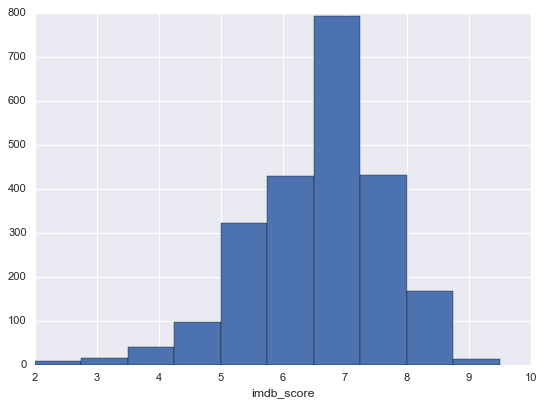

In [102]:
plt.hist(us_imdb_score)
plt.xlabel('imdb_score')

In [103]:
raw_titles.head()

,id,title,type,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,48,['documentation'],US,NaN,6.6,2279.0
1,tm84618,Taxi Driver,MOVIE,1976,113,"['crime', 'drama']",US,tt0075314,8.3,795222.0
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,91,"['comedy', 'fantasy']",GB,tt0071853,8.2,530877.0
3,tm70993,Life of Brian,MOVIE,1979,94,['comedy'],GB,tt0079470,8.0,392419.0
4,tm190788,The Exorcist,MOVIE,1973,133,['horror'],US,tt0070047,8.1,391942.0


In [104]:
new_raw_titles.head(2)

,id,title,type,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,...,TZ,UA,US,UY,VA,VE,VN,XX,ZA,ZW
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,48,['documentation'],US,NaN,6.6,2279.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tm84618,Taxi Driver,MOVIE,1976,113,"['crime', 'drama']",US,tt0075314,8.3,795222.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
new_raw_titles.loc[new_raw_titles['US'] == 1, 'imdb_score']

0       6.6
1       8.3
4       8.1
6       7.7
7       7.8
       ... 
5522    6.6
5531    6.6
5534    6.6
5537    6.6
5548    4.6
Name: imdb_score, Length: 2316, dtype: float64

In [106]:
us_movie = new_raw_titles.loc[(new_raw_titles['type'] == 'MOVIE') & (new_raw_titles['US']==1), 'imdb_score']

In [107]:
us_show = new_raw_titles.loc[(new_raw_titles['type'] == 'SHOW') & (new_raw_titles['US']==1), 'imdb_score']

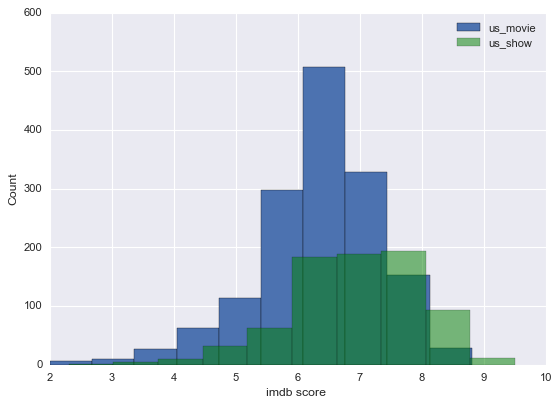

In [108]:
plt.hist(us_movie)
plt.hist(us_show, alpha = 0.5, color = 'green')
plt.xlabel('imdb score ')
plt.ylabel('Count')
plt.legend(['us_movie','us_show'])

In [109]:
raw_titles.head(3)

,id,title,type,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,48,['documentation'],US,NaN,6.6,2279.0
1,tm84618,Taxi Driver,MOVIE,1976,113,"['crime', 'drama']",US,tt0075314,8.3,795222.0
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,91,"['comedy', 'fantasy']",GB,tt0071853,8.2,530877.0


In [110]:
global_imdb_score = raw_titles['imdb_score']

In [111]:
new_raw_titles.head(2)

,id,title,type,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,...,TZ,UA,US,UY,VA,VE,VN,XX,ZA,ZW
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,48,['documentation'],US,NaN,6.6,2279.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tm84618,Taxi Driver,MOVIE,1976,113,"['crime', 'drama']",US,tt0075314,8.3,795222.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
us_movie_imdb = new_raw_titles.loc[(new_raw_titles['type']== 'MOVIE') & (new_raw_titles['US']) == 1, 'imdb_score']

(array([  6.,  10.,  27.,  63., 113., 297., 507., 329., 153.,  28.]),
 array([2.  , 2.68, 3.36, 4.04, 4.72, 5.4 , 6.08, 6.76, 7.44, 8.12, 8.8 ]),
 <BarContainer object of 10 artists>)

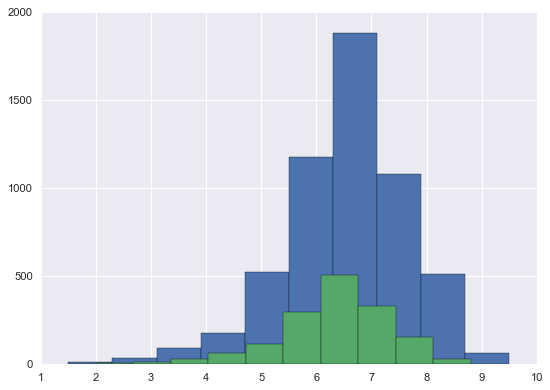

In [113]:
plt.hist(global_imdb_score)
plt.hist(us_movie_imdb)

In [114]:
new_raw_titles.head()

,id,title,type,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,...,TZ,UA,US,UY,VA,VE,VN,XX,ZA,ZW
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,48,['documentation'],US,NaN,6.6,2279.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tm84618,Taxi Driver,MOVIE,1976,113,"['crime', 'drama']",US,tt0075314,8.3,795222.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,91,"['comedy', 'fantasy']",GB,tt0071853,8.2,530877.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tm70993,Life of Brian,MOVIE,1979,94,['comedy'],GB,tt0079470,8.0,392419.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tm190788,The Exorcist,MOVIE,1973,133,['horror'],US,tt0070047,8.1,391942.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
new_raw_titles.shape

(5555, 117)

In [116]:
raw_titles['genres']

0           ['documentation']
1          ['crime', 'drama']
2       ['comedy', 'fantasy']
3                  ['comedy']
4                  ['horror']
                ...          
5550     ['drama', 'romance']
5551               ['comedy']
5552               ['comedy']
5553     ['romance', 'drama']
5554      ['family', 'drama']
Name: genres, Length: 5555, dtype: object

In [117]:
import re
raw_titles['genres'] = raw_titles['genres'].apply(lambda genres : re.sub(r'[^a-z,]+','', genres))

C:\Users\240G_up\AppData\Local\Temp\ipykernel_9984\1358881840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_titles['genres'] = raw_titles['genres'].apply(lambda genres : re.sub(r'[^a-z,]+','', genres))


In [118]:
raw_titles['genres']

0        documentation
1          crime,drama
2       comedy,fantasy
3               comedy
4               horror
             ...      
5550     drama,romance
5551            comedy
5552            comedy
5553     romance,drama
5554      family,drama
Name: genres, Length: 5555, dtype: object

In [119]:
raw_titles.head(2)

,id,title,type,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,48,documentation,US,NaN,6.6,2279.0
1,tm84618,Taxi Driver,MOVIE,1976,113,"crime,drama",US,tt0075314,8.3,795222.0


In [120]:
raw_titles['genres'].unique()

array(['documentation', 'crime,drama', 'comedy,fantasy', ...,
       'action,animation,family', 'crime,comedy,drama,thriller,action',
       'music,romance,comedy'], dtype=object)

In [121]:
raw_titles['genres'].value_counts()

comedy                                                         468
drama                                                          332
documentation                                                  299
comedy,drama                                                   137
drama,comedy                                                   125
                                                              ... 
animation,scifi,action,comedy,family                             1
action,comedy,family,animation                                   1
war,drama,romance,thriller                                       1
comedy,crime,family,fantasy,scifi,animation,action,european      1
music,romance,comedy                                             1
Name: genres, Length: 1608, dtype: int64

In [122]:
raw_titles['genres']

0        documentation
1          crime,drama
2       comedy,fantasy
3               comedy
4               horror
             ...      
5550     drama,romance
5551            comedy
5552            comedy
5553     romance,drama
5554      family,drama
Name: genres, Length: 5555, dtype: object

In [123]:
raw_titles['genres'] =  raw_titles['genres'].replace('', 'uknown_genres')


C:\Users\240G_up\AppData\Local\Temp\ipykernel_9984\198966275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_titles['genres'] =  raw_titles['genres'].replace('', 'uknown_genres')


In [124]:
raw_titles = raw_titles.loc[raw_titles['genres']!= 'uknown_genres', :]

In [125]:
raw_titles.reset_index(drop = True, inplace = True)

In [126]:
unique_words1 = []
for i in raw_titles['genres']:
    for j in str(i).split(','):
        if j not in unique_words1:
            unique_words1.append(j)

In [127]:
unique_words1

['documentation',
 'crime',
 'drama',
 'comedy',
 'fantasy',
 'horror',
 'european',
 'thriller',
 'action',
 'music',
 'romance',
 'family',
 'western',
 'war',
 'animation',
 'history',
 'scifi',
 'reality',
 'sport']

In [128]:
raw_titles.shape

(5514, 10)

In [129]:
len(unique_words1)

19

In [130]:
type(unique_words1)

list

In [131]:
empty_matrix1 = np.zeros(len(unique_words1))
df_neww = pd.Series(empty_matrix1, index = unique_words1)

In [132]:
len(df_neww)

19

In [133]:
def empty_matrix1(unique_words1):
    empty_matrix1 = np.zeros(len(unique_words1))
    df_neww = pd.Series(empty_matrix1, index = unique_words1)
    return df_neww


In [134]:
empty_matrix1(unique_words1)

documentation    0.0
crime            0.0
drama            0.0
comedy           0.0
fantasy          0.0
horror           0.0
european         0.0
thriller         0.0
action           0.0
music            0.0
romance          0.0
family           0.0
western          0.0
war              0.0
animation        0.0
history          0.0
scifi            0.0
reality          0.0
sport            0.0
dtype: float64

In [135]:
empty_matrix1

<function __main__.empty_matrix1(unique_words1)>

In [136]:
raw_titles['genres'].values

array(['documentation', 'crime,drama', 'comedy,fantasy', ..., 'comedy',
       'romance,drama', 'family,drama'], dtype=object)

In [137]:
genres_dict = dict()
idx = 0
for rows in raw_titles.genres.values:
    new_series1 = empty_matrix1(unique_words1)
    for values in rows.split(','):
        new_series1[values]= 1
    genres_dict[idx] = new_series1
    idx = idx+1

In [138]:
len(genres_dict)

5514

In [139]:
raw_titles['genres'].unique()

array(['documentation', 'crime,drama', 'comedy,fantasy', ...,
       'action,animation,family', 'crime,comedy,drama,thriller,action',
       'music,romance,comedy'], dtype=object)

In [140]:
genres_dict[1]

documentation    0.0
crime            1.0
drama            1.0
comedy           0.0
fantasy          0.0
horror           0.0
european         0.0
thriller         0.0
action           0.0
music            0.0
romance          0.0
family           0.0
western          0.0
war              0.0
animation        0.0
history          0.0
scifi            0.0
reality          0.0
sport            0.0
dtype: float64

In [141]:
genres_dict_onehot_encoding = pd.DataFrame(genres_dict).T

In [142]:
genres_dict_onehot_encoding.shape

(5514, 19)

In [143]:
unique_words1

['documentation',
 'crime',
 'drama',
 'comedy',
 'fantasy',
 'horror',
 'european',
 'thriller',
 'action',
 'music',
 'romance',
 'family',
 'western',
 'war',
 'animation',
 'history',
 'scifi',
 'reality',
 'sport']

In [144]:
new_genres_titles = pd.concat([raw_titles, genres_dict_onehot_encoding], axis = 1)

In [145]:
new_genres_titles

,id,title,type,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,...,music,romance,family,western,war,animation,history,scifi,reality,sport
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,48,documentation,US,NaN,6.6,2279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,tm84618,Taxi Driver,MOVIE,1976,113,"crime,drama",US,tt0075314,8.3,795222.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,91,"comedy,fantasy",GB,tt0071853,8.2,530877.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,tm70993,Life of Brian,MOVIE,1979,94,comedy,GB,tt0079470,8.0,392419.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,tm190788,The Exorcist,MOVIE,1973,133,horror,US,tt0070047,8.1,391942.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5509,tm1004011,Time to Dance,MOVIE,2021,107,"drama,romance",IN,tt8622232,2.2,950.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5510,ts307884,HQ Barbers,SHOW,2021,24,comedy,NG,NaN,6.6,2279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5511,tm1040816,Momshies! Your Soul is Mine,MOVIE,2021,108,comedy,PH,tt14412240,5.8,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5512,tm1014599,Fine Wine,MOVIE,2021,100,"romance,drama",NG,tt13857480,6.9,39.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
new_raw_titles_data = pd.merge(new_raw_titles, new_genres_titles, how = 'left')

In [147]:
new_raw_titles_data.shape

(5555, 136)